# <b> Laboratório 4

Aluno: Rafael Mendes Campello

Referência: https://ecee.colorado.edu/~mathys/ecen4652/lab04/

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from importlib import reload
import ModuleLab1
import ModuleLab2
import ModuleLab4
from importlib import reload
from Resources import showfun_basic, comsig
reload(ModuleLab4)

<module 'ModuleLab4' from '/home/rcampello/Main/3m/Simulação de sistemas de comunicação/Labs/Lab4/ModuleLab4.py'>

# E1

## a

Não há componente em 2.7kHz no sinal reconstruído devido ao fato de que quando fizemos o downsample por um fator de 8 temos efetivamente uma forma de onda amostrada com 4kHz, e pelo teorema da amostragem essa taxa de amostragem só é suficiente para representar formas de onda com 2kHz de banda, por exemplo se $f_0 = 1.9$ kHz, conseguiríamos observar a faixa de frequência correspondente. Outra forma de interpretar é que obtemos $\textit{aliasing}$ ao realizar o downsample.

<img src = "Prints/E1-A-1.png">
<img src = "Prints/E1-A-2.png">

## b

Para a onda retangular, mesmo usando $f_0 = 1$kHz, a forma de onda reconstruída é uma senoide de mesma frequência, pois o sinal original possui banda infinita, não é possível reconstruí-lo perfeitamente. Abaixo também é mostrado a forma de onda corretamente reconstruída caso fosse utilizado o pulso 'rect'.

<img src = "Prints/E1-B-1.png">
<img src = "Prints/E1-B-2.png">

Utilizando pulso 'rect':
<img src = "Prints/E1-B-5.png">

Para o caso da forma de onda retangular, temos componentes múltiplas ímpares de $f_0$ no sinal original ($f_0$, $3f_0$, $5f_0$...). Ajustando $f_0$, podemos ver que com $f_0 = 1000$Hz, componentes espectrais de alias estão presentes no sinal reconstruído, dependendo do $f_0$ utilizado podemos ver diferentes quantidades de componentes de aliasing presentes. Para $f_0 = 1200$Hz, por exemplo, temos uma componente de alias em $f = 400$ Hz (que era originalmente um dos múltiplos ímpares de $f_0$). Um outro teste interessante é considerar um $f_0$ que mapeia vários alias para o sinal reconstuído como $f_0 = 1115$Hz, nesse caso, mais componentes de alias (de menor amplitude) aparecem no sinal reconstruído. Até mesmo considerando $f_0 = 400$Hz, o sinal reconstruído terá mais componentes de alias espalhados pela banda do sinal reconstruído, e o sinal no tempo será mais parecido com a forma de onda retangular original. Para a onda retangular, como temos infinitas componentes espectrais no sinal original, a escolha de $f_0$ serve para determinar a distribuição dessas infinitas componentes na banda do sinal recebido. Mesmo valores menores de $f_0$ podem resultar em uma distribuição mais "espalhada" dessas componentes no espectro recebido.

Outro caso interessante é considerar a diferença entre $f_0 = 1200$Hz e $f_0 = 1201$Hz, claramente não existe diferença significativa prática entre os sinais teoricamente. Mas com $f_0 = 1201$Hz os infinitos alias vão ser refletidos para a banda base em lugares ligeiramente diferentes resultando em um efeito de "escada" (o espectro vai ficar "levantado" com relação ao restante). Para $f_0 = 1200$Hz isso não ocorre pois os aliases são refletivos para exatamente a mesma frequência.

Utilizando pulso 'sinc':
<img src = "Prints/E1-B-3.png">
<img src = "Prints/E1-B-4.png">
<img src = "Prints/E1-B-Extra.png">
<img src = "Prints/E1-B-Extra2.png">

Utilizando pulso 'rect':
<img src = "Prints/E1-B-6.png">

## c

Montamos um esquemático análogo ao sampling003.grc apresentado no material.

<img src = "Prints/E1-C-1.png">

Para fc = Fs2
<img src = "Prints/E1-C-2.png">

Para fc = 2 Fs2
<img src = "Prints/E1-C-3.png">

Para comparar a propriedade de modulação AM apresentada, criamos um segundo sinal que é a soma das duas componentes $f_c + f_0$ e $f_c - f_0$ e comparamos ao sinal reconstruído


<img src = "Prints/E1-C-4.png">

<img src = "Prints/E1-C-5.png">

Conforme esperado, os sinais são idênticos.

## d

In [2]:
reload(ModuleLab4)

<module 'ModuleLab4' from '/home/rcampello/Main/3m/Simulação de sistemas de comunicação/Labs/Lab4/ModuleLab4.py'>

É feita a implementação dos dois novos pulsos na função pam10 do Lab2. Abaixo são replicados os exemplos indicados no material.

Para o pulso 'man': Manchester

In [3]:
string = "Test"
bit_sequence = ModuleLab1.asc2bin(string)
polar = 2 * bit_sequence - 1
polar = np.concatenate((np.zeros(2, ), polar, np.zeros(2,)))

Fs = 44100
Fb = 100

n0 = -2
ss = comsig.sigSequ(polar, FB=Fb, n0=n0)
stt = np.array(np.round(Fs * (np.arange(0, len(ss)) + ss.get_n0()) / Fb), dtype=np.int32) - int(np.ceil(Fs * (ss.get_n0() - 0.5) / Fb))
stt = stt[2:-2]

Text(0.5, 1.0, "Polar Binary PAM for string 'Test', $F_b$ = 100 Baud, Manchester $p(t)$")

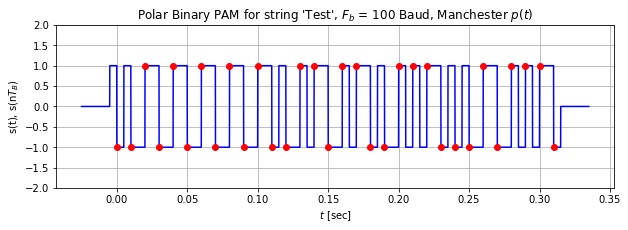

In [4]:
sig = ModuleLab4.pam11(ss, Fs, "man", [])
plt.figure(figsize=(10, 3))
plt.plot(sig.timeAxis(), sig.signal(), color = "blue")
plt.plot(sig.timeAxis()[stt], sig.signal()[stt], marker = "o", color = "red", linestyle="none")
plt.grid()
plt.xlabel(f"$t$ [sec]")
plt.ylabel(f"s(t), s(n$T_B$)")
plt.ylim([-2, 2])
plt.title(f"Polar Binary PAM for string '{string}', $F_b$ = {Fb} Baud, Manchester $p(t)$")

Para o pulso 'RCf': Raised Cosine in Frequency

Text(0.5, 1.0, "Polar Binary PAM for string 'Test', $F_b$ = 100 Baud, RCf $p(t)$, k = 5, $\\alpha$ = 0.4")

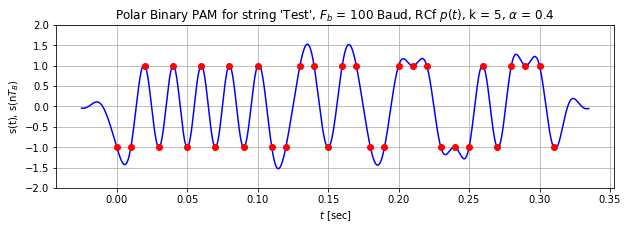

In [5]:
k = 5
alpha = 0.4
sig = ModuleLab4.pam11(ss, Fs, "rcf", [k, alpha])
plt.figure(figsize=(10, 3))
plt.plot(sig.timeAxis(), sig.signal(), color = "blue")
plt.plot(sig.timeAxis()[stt], sig.signal()[stt], marker = "o", color = "red", linestyle="none")
plt.grid()
plt.xlabel(f"$t$ [sec]")
plt.ylabel(f"s(t), s(n$T_B$)")
plt.ylim([-2, 2])
# plt.title(f"Polar Binary PAM for string '{string}', $F_b$ = {Fb} Baud, RCf $p(t)$, k = {k}, $\alpha$ = {alpha}")
plt.title(r"Polar Binary PAM for string '{}', $F_b$ = {} Baud, RCf $p(t)$, k = {}, $\alpha$ = {}".format(string, Fb, k, alpha))

## e

Para o pulso de Manchester:

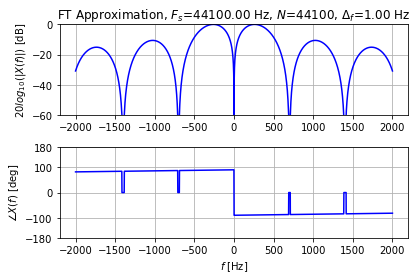

In [6]:
Fs = 44100
#Sampling rate
FB = 350
#Baud rate
N = FB
#Number of symbols
an = np.hstack((np.zeros(round(N/2)), 1, np.zeros(round(N/2)-1)))
#Single pulse, padded with zerosan = np.hstack((np.zeros(round(N/2)), 1, np.zeros(round(N/2)-1)))
sig_an = comsig.sigSequ(an, FB, 0)
# # ***** Set ptype, pparms here *****
sig_pt = ModuleLab4.pam11(sig_an,Fs,"man",[]) #Generate PAM pulse
sig_pt.set_t0(sig_pt.get_t0()-(N/2)/float(FB)) #Place center of pulse at t=0
# # ***** Set ff_parms here *****
_, _, _ = ModuleLab2.showft(sig_pt,[-2000, 2000, -60]) #Plot FT of pulse

Conforme esperado, o pulso possui componente DC nula.

In [7]:
sig_pt.timeAxis().shape

(44100,)

(-0.01, 0.01)

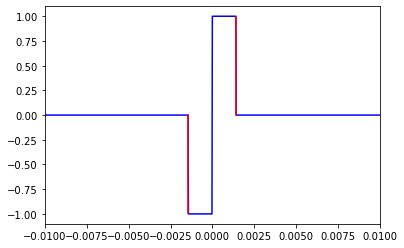

In [8]:
plt.plot(sig_pt.timeAxis(), sig_pt.signal(), color = "blue")

plt.plot([1/350 / 2 for i in range(100)], [i/100 for i in range(100)], color = "red")
plt.plot([-1/350 / 2 for i in range(100)], [-i/100 for i in range(100)], color = "red")

plt.xlim([-0.01, 0.01])

No tempo, o pulso também é conforme o esperado: estando definido de -Tb/2 até Tb/2 e simétrico em torno do 0

Para o pulso 'Rcf':

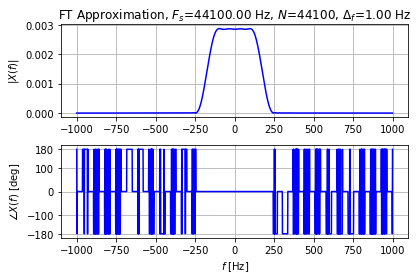

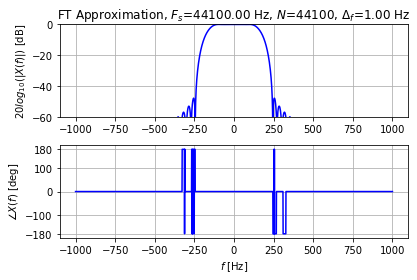

In [9]:
Fs = 44100
#Sampling rate
FB = 350
#Baud rate
N = FB
#Number of symbols
an = np.hstack((np.zeros(round(N/2)), 1, np.zeros(round(N/2)-1)))
#Single pulse, padded with zeros
sig_an = comsig.sigSequ(an, FB, 0)
# # ***** Set ptype, pparms here *****
sig_pt = ModuleLab4.pam11(sig_an,Fs,"rcf",[k, 0.4]) #Generate PAM pulse
sig_pt.set_t0(sig_pt.get_t0()-(N/2)/float(FB)) #Place center of pulse at t=0
# # ***** Set ff_parms here *****
_, _, _ = ModuleLab2.showft(sig_pt,[-1000, 1000, 0]) #Plot FT of pulse

_, _, _ = ModuleLab2.showft(sig_pt,[-1000, 1000, -60]) # para o gráfico em dB

O gráfico na frequência é conforme o esperado, temos uma "porta suavizada"

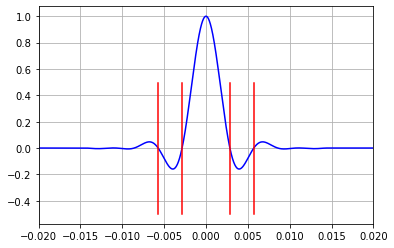

In [10]:
plt.plot(sig_pt.timeAxis(), sig_pt.signal(), color = "blue")

plt.plot([1/350 for i in range(100)], [i/100 - 0.5 for i in range(100)], color = "red")
plt.plot([-1/350 for i in range(100)], [i/100 - 0.5 for i in range(100)], color = "red")


plt.plot([2/350 for i in range(100)], [i/100 - 0.5 for i in range(100)], color = "red")
plt.plot([-2/350 for i in range(100)], [i/100 - 0.5 for i in range(100)], color = "red")

plt.xlim([-0.02, 0.02])
plt.grid()

No tempo também temos o comportamento esperado, conforme o material, os cruzamentos com o zero acontecem nos instantes múltiplos de Tb (indicado pelas linhas vermelhas acima)

# E2

## a

In [11]:
reload(ModuleLab4)

<module 'ModuleLab4' from '/home/rcampello/Main/3m/Simulação de sistemas de comunicação/Labs/Lab4/ModuleLab4.py'>

O única modificação necessária na função fornecida é incluir todos os traces, da mesma forma que já foi feito para os 2 primeiros.

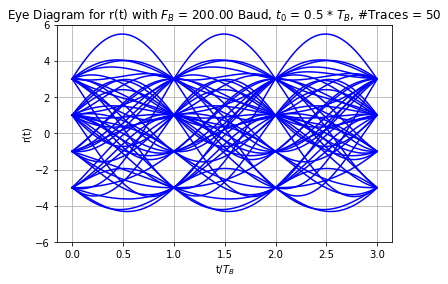

In [12]:
Fs = 44100
# Sampling rate
FB = 200
# Baud rate
NTd = 50
# Number of traces displayed
N = NTd+10
# Number of data symbols
L = 4
# Number of data levels
dly = 0.5
# Trigger delay TB/2
dn = np.floor(L*np.random.rand(N)) # Unipolar L-valued random data
an = 2*dn - (L-1)
# Polar L-valued DT sequence
sig_an = comsig.sigSequ(an, FB, 0) # DT sequence class
sig_st = ModuleLab4.pam11(sig_an, Fs, 'sinc', [20, 0])
# PAM signal, ’sinc’ p(t)
ModuleLab4.showeye(sig_st, FB, NTd, [dly, 3, -1.5*L, 1.5*L])

## b

In [13]:
Fs, rt = ModuleLab1.wavread("Files/pamsig401.wav")

Para auxiliar na recuperação de informação, iremos olhar para o sinal no tempo, na frequência e no diagrama de olho (tanto para apenas 1 trace como para 50).

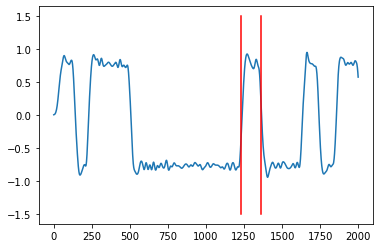

In [14]:
plt.plot(rt[:2000])
plt.plot([1230 for i in range(10)], [i/3 - 1.5 for i in range(10)], color = "red")
plt.plot([1360 for i in range(10)], [i/3 - 1.5 for i in range(10)], color = "red")

In [15]:
Fs / (130)

339.2307692307692

Com a determinação acima, $F_B$ parece ser algo próximo a 340Hz

$p(t)$ é binário polar

L = 2

In [16]:
sig = comsig.sigWave(rt, Fs, 0)

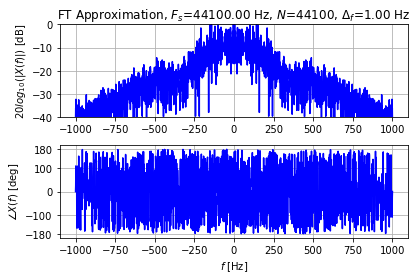

In [17]:
_, _, _ = ModuleLab2.showft(sig,[-1000, 1000, -40])

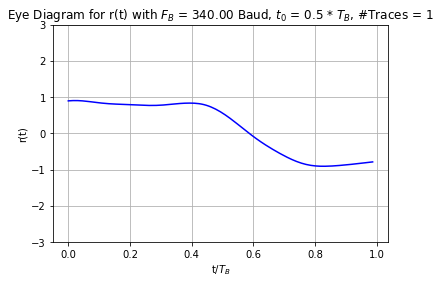

In [18]:
L = 2
dly = 0.5
FB = 340
ModuleLab4.showeye(sig, FB, 1, [dly, 1, -1.5*L, 1.5*L])

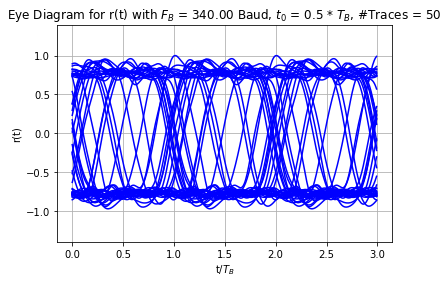

In [19]:
ModuleLab4.showeye(sig, FB, 50, [dly, 3, -1.4, 1.4])

A principal deteriorização do sinal parece ser o timming jitter (devido ao deslocamente horizontal dos traces).

Para o segundo sinal:

In [20]:
Fs, rt = ModuleLab1.wavread("Files/pamsig402.wav")

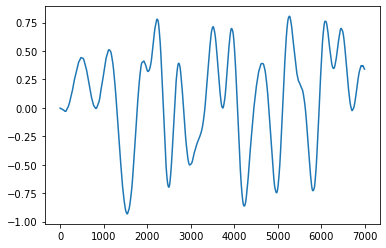

In [21]:
plt.plot(rt[:7000])

In [22]:
sig = comsig.sigWave(rt, Fs, 0)

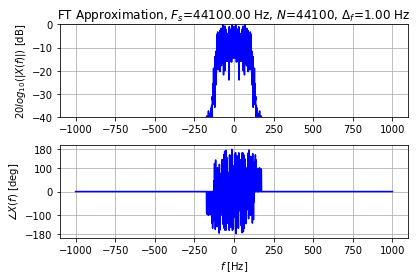

In [23]:
_, _, _ = ModuleLab2.showft(sig,[-1000, 1000, -40])

O sinal parece ter utilizado pulsos 'RCf', a depender do alpha utilizado devemos procurar por $F_B$ no intervalo [180Hz, 240Hz], e ver qual valor retorna o diagrama de olho mais "aberto".

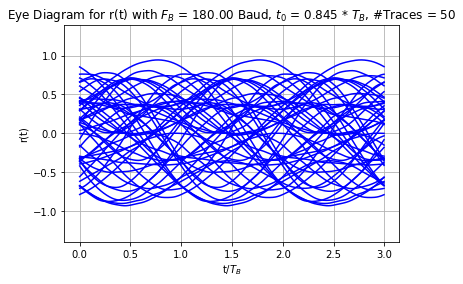

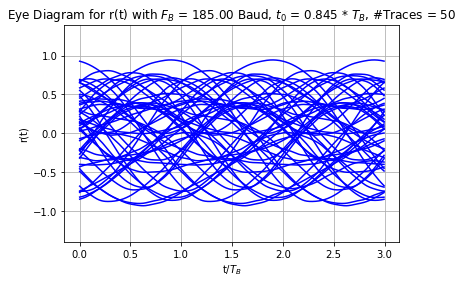

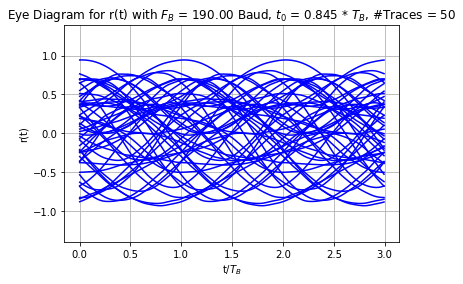

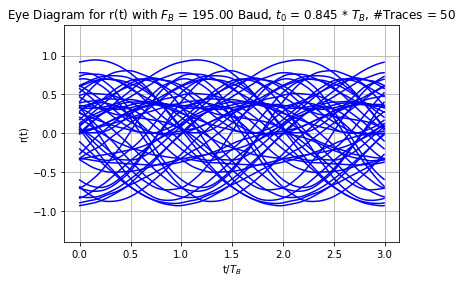

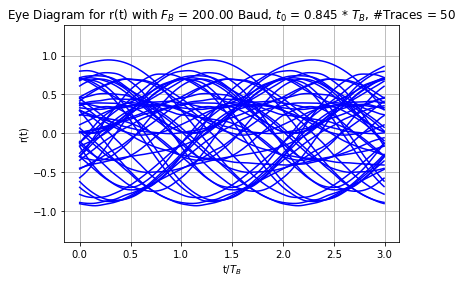

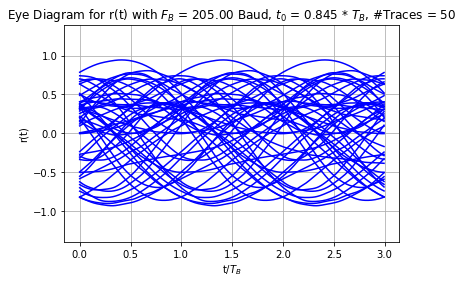

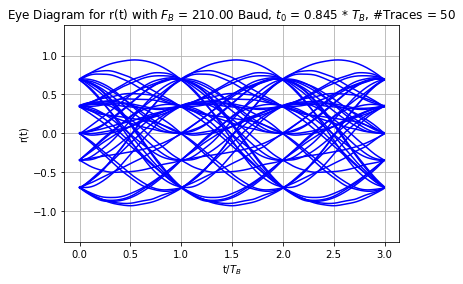

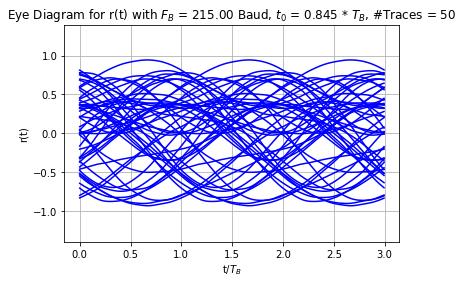

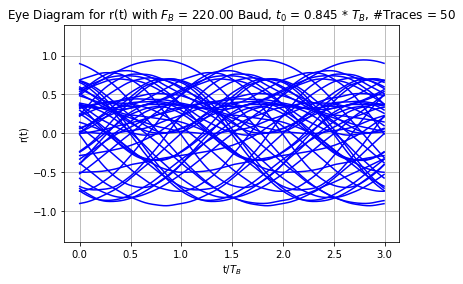

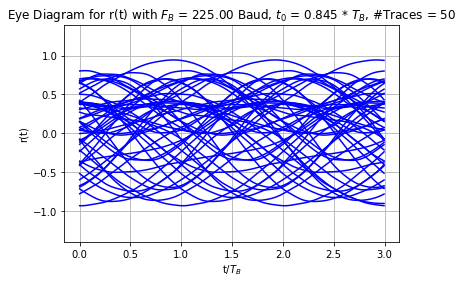

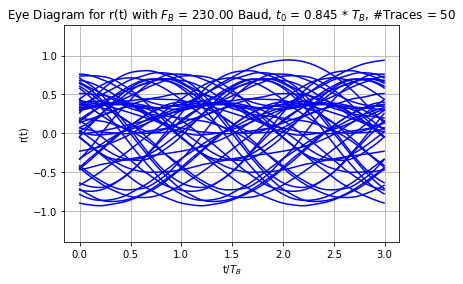

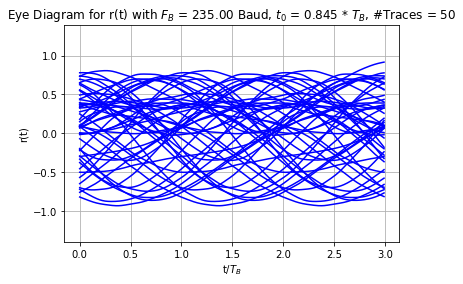

In [24]:
for FB in np.arange(180, 240, 5):
    dly = 0.845
    ModuleLab4.showeye(sig, int(FB), 50, [dly, 3, -1.4, 1.4])

Claramente, $F_B = 210$Hz e o sinal parece ter 5 níveis (L = 5), devido aos 5 cruzamentos bem definitos posicionados nos instantes, não parece existir deteriorização do sinal.

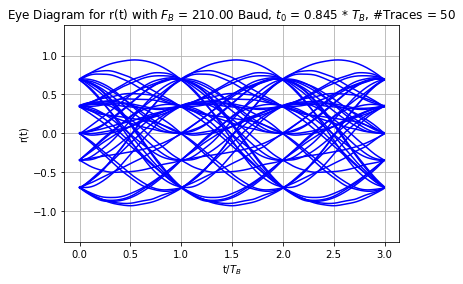

In [25]:
dly = 0.845
ModuleLab4.showeye(sig, 210, 50, [dly, 3, -1.4, 1.4])

## c

Inicialmente, faremos um plot do arquivo original:

In [26]:
Fs, rt = ModuleLab1.wavread("Files/pamsig403.wav")

In [27]:
sig = comsig.sigWave(rt, Fs, 0)

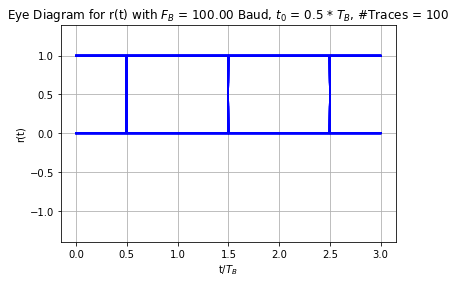

In [28]:
dly = 0.5
ModuleLab4.showeye(sig, 100, 100, [dly, 3, -1.4, 1.4])

O diagrama corresponde ao binary unipolar conforme dito no enunciado.

Abaixo, são mostrados os diagramas de olho para o sinal obtido ao utilizar diferentes parâmetros $f_L$ na determinação do filtro Butterworth.

O esquemático utilizado para obter estes arquivos $\texttt{.wav}$ também é mostrado abaixo.

<img src="Prints/E2-C-1.png">

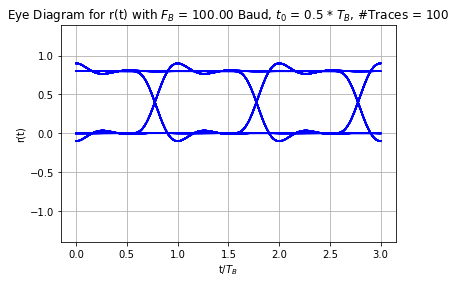

In [29]:
# Para fL = 2 * Fb
Fs, rt = ModuleLab1.wavread("pamsig403_rcv_dot2.wav")
sig = comsig.sigWave(rt, Fs, 0)
dly = 0.5
ModuleLab4.showeye(sig, 100, 100, [dly, 3, -1.4, 1.4])

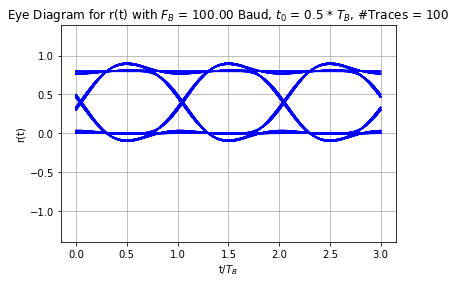

In [30]:
# Para fL = 1 * Fb
Fs, rt = ModuleLab1.wavread("pamsig403_rcv_dot1.wav")
sig = comsig.sigWave(rt, Fs, 0)
dly = 0.5
ModuleLab4.showeye(sig, 100, 100, [dly, 3, -1.4, 1.4])

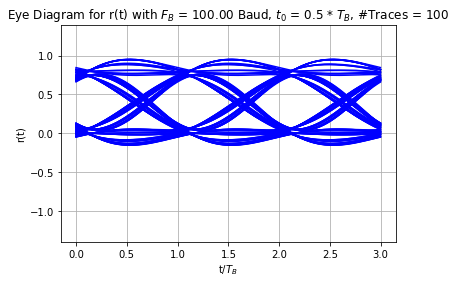

In [31]:
# Para fL = 0.5 * Fb
Fs, rt = ModuleLab1.wavread("pamsig403_rcv_dot5.wav")
sig = comsig.sigWave(rt, Fs, 0)
dly = 0.5
ModuleLab4.showeye(sig, 100, 100, [dly, 3, -1.4, 1.4])

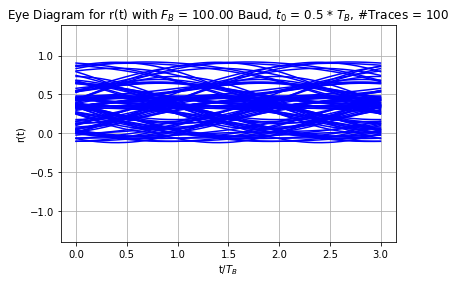

In [32]:
# Para fL = 0.25 * Fb
Fs, rt = ModuleLab1.wavread("pamsig403_rcv_dot25.wav")
sig = comsig.sigWave(rt, Fs, 0)
dly = 0.5
ModuleLab4.showeye(sig, 100, 100, [dly, 3, -1.4, 1.4])

Para os experimentos acima, vemos que utilizar $f_L$ baixo (por exemplo $0.25 F_B$) degrada muito o sinal recebido depois do canal, o que é de se esperar já que a baixa frequência de corte do filtro impede que boa parte do sinal passe pelo canal. Neste exemplo, utilizqar $0.5 F_B$ parece ser suficiente para recuperar a maior parte do sinal.

Para determinar o $N$ e $f_L$ do plot fornecido, podemos perceber que o sinal parece bastante com o gráfico de descarga de um filtro RC (a tensão obtida sobre o capacitor, neste caso o circuito é um passa-baixa). Podemos fazer um paralelo com o gráfico apresentado na atividade em que é utilizado o filtro Butterworth.

Para o circuito RC simples, cerca de $63.2\%$ da tensão é obtida com $\tau = RC$ (ver [Wikipedia (RC Circuit)](https://en.wikipedia.org/wiki/RC_circuit) e [Resposta no tempo](https://en.wikipedia.org/wiki/File:Series_RC_capacitor_voltage.svg)). Portanto, podemos assumir que $0.5 T_B$ corresponde ao $\tau$ e por isso $f_L = 50$Hz. Podemos testar essa hipótese gerando a forma de onda utilizando $N = 1$ (filtro de primeira ordem) e este valor de $f_L$.

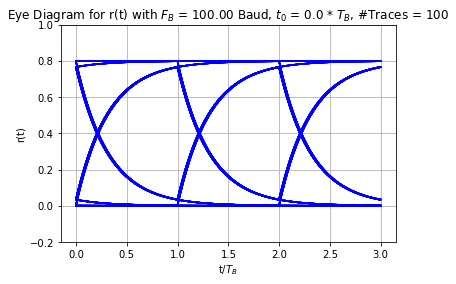

In [33]:
# Para fL = 0.5 * Fb
Fs, rt = ModuleLab1.wavread("pamsig403_part2_rcv_N_1_dot5.wav")
sig = comsig.sigWave(rt, Fs, 0)
dly = 0.0
ModuleLab4.showeye(sig, 100, 100, [dly, 3, -0.2, 1.0])

In [34]:
3/100 * Fs

960.0

Que parece ser exatamente o gráfico indicado na questão.

# E3

In [35]:
reload(ModuleLab4)

<module 'ModuleLab4' from '/home/rcampello/Main/3m/Simulação de sistemas de comunicação/Labs/Lab4/ModuleLab4.py'>

## a

In [36]:
string = "Test"
bit_sequence = ModuleLab1.asc2bin(string)
polar = 2 * bit_sequence - 1
polar = np.concatenate((np.zeros(2, ), polar, np.zeros(2,)))


Fs = 44100
Fb = 100

n0 = -2
ss = comsig.sigSequ(polar, FB=Fb, n0=n0)
stt = np.array(np.round(Fs * (np.arange(0, len(ss)) + ss.get_n0()) / Fb), dtype=np.int32) - int(np.ceil(Fs * (ss.get_n0() - 0.5) / Fb))
stt = stt[2:-2]

Text(0.5, 1.0, "Polar Binary PAM for string 'Test', $F_b$ = 100 Baud, Class I PR $p(t)$, k = 10")

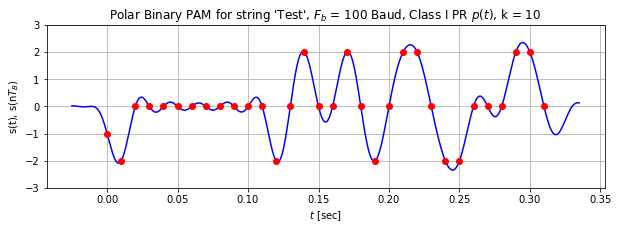

In [37]:
k = 10
sig = ModuleLab4.pam11(ss, Fs, "pr1", [k])
plt.figure(figsize=(10, 3))
plt.plot(sig.timeAxis(), sig.signal(), color = "blue")
plt.plot(sig.timeAxis()[stt], sig.signal()[stt], marker = "o", color = "red", linestyle="none")
plt.grid()
plt.xlabel(f"$t$ [sec]")
plt.ylabel(f"s(t), s(n$T_B$)")
plt.ylim([-3, 3])
plt.title(f"Polar Binary PAM for string '{string}', $F_b$ = {Fb} Baud, Class I PR $p(t)$, k = {k}")

## b

Para o pulso 'sinc':

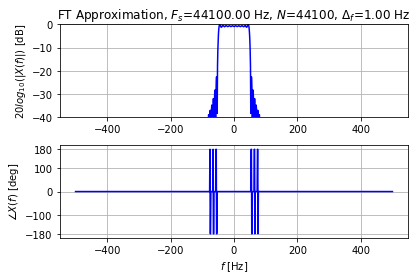

In [38]:
k = 10

Fs = 44100
#Sampling rate
FB = 100
#Baud rate
N = FB
#Number of symbols
an = np.hstack((np.zeros(round(N/2)), 1, np.zeros(round(N/2)-1)))
#Single pulse, padded with zeros
sig_an = comsig.sigSequ(an, FB, 0)
# # ***** Set ptype, pparms here *****
sig_pt = ModuleLab4.pam11(sig_an,Fs,"sinc",[k, 0.4]) #Generate PAM pulse
sig_pt.set_t0(sig_pt.get_t0()-(N/2)/float(FB)) #Place center of pulse at t=0
# # ***** Set ff_parms here *****
_, _, _ = ModuleLab2.showft(sig_pt,[-500, 500, -40]) #Plot FT of pulse

Para verificar a propriedade de ausência de ISI para o pulso 'sinc', somaremos as versões transladadas do espectro do pulso 'sinc' e verificar que a mesma é um reta horizontal.

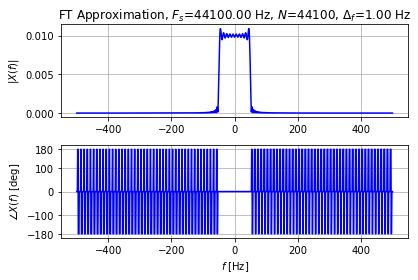

In [39]:
_, ft_sinc, _ = ModuleLab2.showft(sig_pt,[-500, 500, 0]) #Plot FT of pulse

In [40]:
total = 0
for i in range(-4, 4 + 1):
    total += np.roll(ft_sinc, i * 100)

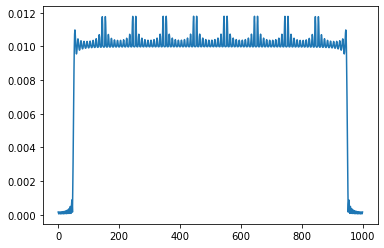

In [41]:
plt.plot(total)

O resultado é conforme o esperado, tendo em conta o fenômeno de Gibbs.

Para o pulso 'PR I':

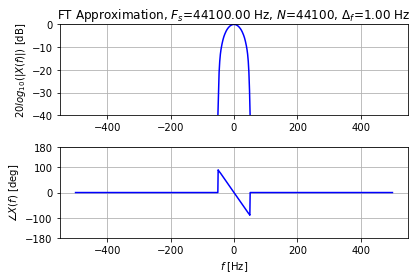

In [42]:
k = 10

Fs = 44100
#Sampling rate
FB = 100
#Baud rate
N = FB
#Number of symbols
an = np.hstack((np.zeros(round(N/2)), 1, np.zeros(round(N/2)-1)))
#Single pulse, padded with zeros
sig_an = comsig.sigSequ(an, FB, 0)
# # ***** Set ptype, pparms here *****
sig_pt = ModuleLab4.pam11(sig_an,Fs,"pr1",[k]) #Generate PAM pulse
sig_pt.set_t0(sig_pt.get_t0()-(N/2)/float(FB)) #Place center of pulse at t=0
# # ***** Set ff_parms here *****
_, _, _ = ModuleLab2.showft(sig_pt,[-500, 500, -40]) #Plot FT of pulse

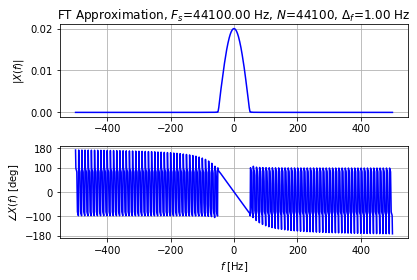

In [43]:
_, ft_pr1, _ = ModuleLab2.showft(sig_pt,[-500, 500, 0]) #Plot FT of pulse

In [44]:
total = 0
for i in range(-4, 4 + 1):
    total += np.roll(ft_pr1, i * 100)

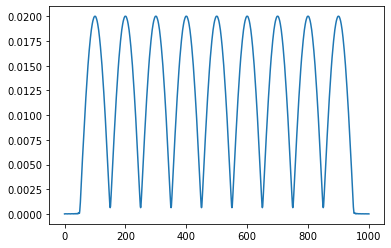

In [45]:
plt.plot(total)

Claramente no caso do pulso PR I os espectros deslocados não somam para um constante, caracterizando a ISI neste tipo de pulso.

Pode ser visto que a transformada do Pulso PR I está de acordo com a apresentada no material (página 13). O 'sinc' se aproxima mais de uma 'porta' no domínio da frequência e satisfaz o critério de Nyquist, enquanto o pulso PR I possui ISI (que também pode ser visto no domínio do tempo, mostrado abaixo).

A propriedade de interferência intersimbólica (ISI) é vista no domínimo no tempo ao verificar os instantes múltiplos de $T_B$. No caso do 'sinc', foi visto na questão E1-E que apenas para $s(0) \ne 0$ e $s(nT_B) = 0$ caso $n \ne 0$. Abaixo podemos ver que para o caso do pulso PR I, temos $s(0) = s(T_B) = 1$, e $s(nT_B) = 0$ caso contrário (resultado de acordo com a página 14 do material).

(-1.0, 2.0)

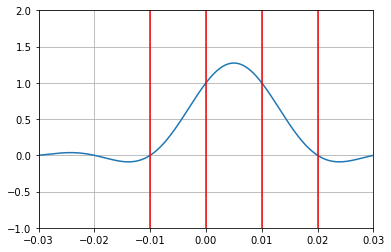

In [46]:
plt.plot(sig_pt.timeAxis(), sig_pt.signal())

plt.plot([-1/FB for i in range(100)], [i/10 - 5 for i in range(100)], color = "red")
plt.plot([0 for i in range(100)], [i/10 - 5 for i in range(100)], color = "red")
plt.plot([1/FB for i in range(100)], [i/10 - 5 for i in range(100)], color = "red")
plt.plot([2/FB for i in range(100)], [i/10 - 5 for i in range(100)], color = "red")


plt.grid()

plt.xlim([-0.03, 0.03])
plt.ylim([-1, 2])

## c

Primeiro, amostramos a forma de onda normalmente, como foi feito no Lab2.

In [47]:
Fs, rt = ModuleLab1.wavread("Files/pr1sig401.wav")

44100


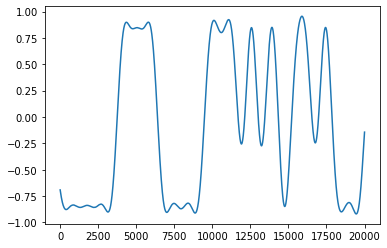

In [48]:
print(Fs)
plt.plot(rt[:20000])

In [49]:
Fb = 100
Tb = 1 / Fb
sig_xt = comsig.sigWave(rt, Fs, -Tb / 2)

In [50]:
n0 = 0
len_sig_seq = 8 * 85
stt = np.array(np.round(Fs * (np.arange(0, len_sig_seq) + n0) / Fb), dtype=np.int32) - int(np.ceil(Fs * (n0 - 0.5) / Fb))

(0.0, 0.5)

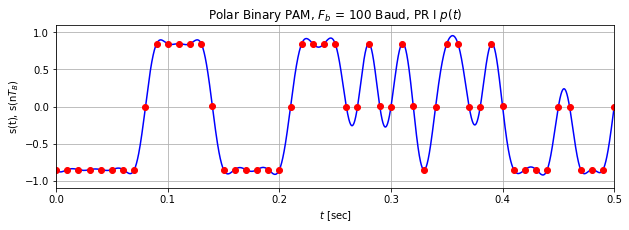

In [51]:
plt.figure(figsize=(10, 3))
plt.plot(sig_xt.timeAxis(), sig_xt.signal(), color = "blue")
plt.plot(sig_xt.timeAxis()[stt], sig_xt.signal()[stt], marker = "o", color = "red", linestyle="none")
plt.grid()
plt.xlabel(f"$t$ [sec]")
plt.ylabel(f"s(t), s(n$T_B$)")
plt.title(f"Polar Binary PAM, $F_b$ = {Fb} Baud, PR I $p(t)$")
plt.xlim([0, 0.5])

Agora, devemos realizar o procedimento da página 16 do material para recuperar a sequência $d_n$, sabendo que foi utilizado o pulso PR I (descrito na página 13) (correspondendo a $Q(z) = 1 + z^{-1}$), e ter cuidado com os fatores de escala (devido ao uso do mapeamento binário polar). De acordo com o procedimento, podemos adicionar dois ao sinal $b_n$ (já que $q_0 = q_1 = 1$), escalar pelo fator $1/2$ e aplicar módulo 2.

In [52]:
rec = sig_xt.signal()[stt][8:-8] * 2
rec += 2
rec = np.round(rec/2).astype(int)

In [53]:
rec[:50]

array([1, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 1, 1, 2, 1,
       1, 2, 1, 0, 1, 2, 2, 1, 1, 2, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 2,
       2, 1, 1, 2, 1, 0])

In [54]:
rec %= 2

In [55]:
st = ModuleLab1.bin2asc(rec, bits = 8, flg = 0)
print(st)

A leader knows what the best thing to do is;
a manager only knows how to do it best


## d

Podemos replicar o funcionamento do diagrama de olho ao visualizar a forma de onda sobreposta por várias versões da mesma forma de onda com atraso (atrasos múltiplos de $T_B$). Utiliza-se o bloco $\texttt{QT GUI TIME SINK}$ com 10 entradas, cada uma das entradas é uma versão atrasada do sinal de entrada (da mesma forma que foi feito na implementação da função em Python).

<img src="Prints/E3-D-1.png">

Como teste, as formas de onda triangular, 'sinc' e o sinal da questão E2-C são apresentados para efeito de conferência.
<img src="Prints/E3-D-2.png">
<img src="Prints/E3-D-3.png">
<img src="Prints/E3-D-4.png">